In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import statsmodels.api as sm

%matplotlib inline

In [2]:
np.random.seed(1)

In [3]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, lw=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

# 1. Support Vector Classifier

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [5]:
X = np.random.randn(20, 2)
y = np.array([1, -1] * 10)

In [6]:
X[y == 1] = X[y == 1] + 1

F:\anacoda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

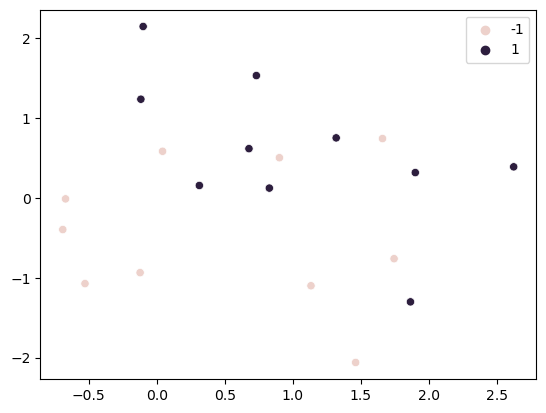

In [7]:
sns.scatterplot(X[:, 0], X[:, 1], hue=y)

In [8]:
svm_clf = SVC(kernel='linear', C=1, random_state=1).fit(X, y)

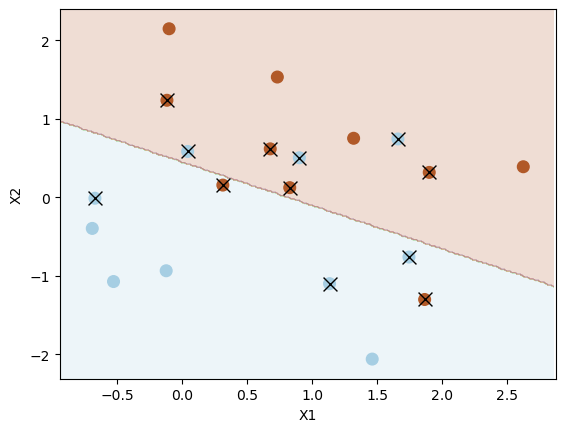

Number of support vectors:  12


In [9]:
plot_svc(svm_clf, X, y)

In [10]:
svm_clf.support_vectors_

array([[ 1.74481176, -0.7612069 ],
       [ 1.13376944, -1.09989127],
       [ 0.04221375,  0.58281521],
       [ 0.90159072,  0.50249434],
       [-0.67124613, -0.0126646 ],
       [ 1.65980218,  0.74204416],
       [ 1.86540763, -1.3015387 ],
       [ 0.6775828 ,  0.61594565],
       [ 0.82757179,  0.12214158],
       [ 1.90085595,  0.31627214],
       [ 0.3128273 ,  0.15479436],
       [-0.11731035,  1.2344157 ]])

In [11]:
svm_clf.support_

array([ 3,  7,  9, 11, 17, 19,  2,  6,  8, 12, 16, 18])

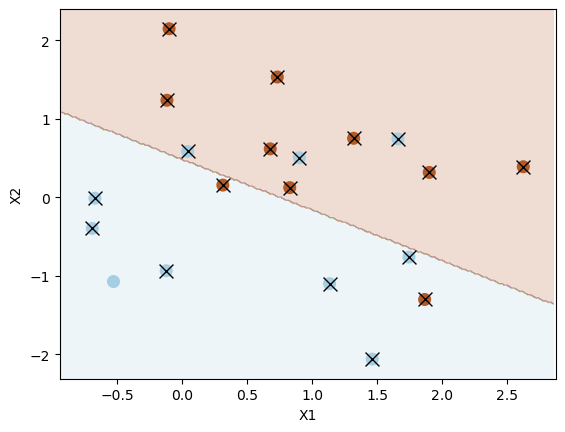

Number of support vectors:  19


In [12]:
svm_clf2 = SVC(kernel='linear', C=0.1, random_state=1).fit(X, y)
plot_svc(svm_clf2, X, y)

In [13]:
svm_clf2.support_

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19,  0,  2,  4,  6,  8, 10, 12, 14,
       16, 18])

In [14]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]
}
tune_svm = GridSearchCV(
    SVC(kernel='linear', random_state=1),
    param_grid, cv=10, scoring='accuracy'
).fit(X, y)

In [15]:
tune_svm.best_params_

{'C': 5}

In [16]:
pd.DataFrame(tune_svm.cv_results_).T

,0,1,2,3,4,5,6
mean_fit_time,0.001378,0.000547,0.001013,0.000918,0.000013,0.001683,0.001784
std_fit_time,0.002619,0.00073,0.002383,0.002425,0.000038,0.004724,0.004761
mean_score_time,0.000206,0.000104,0.000943,0.0,0.000107,0.000104,0.0001
std_score_time,0.000413,0.000313,0.002417,0.0,0.00032,0.000311,0.0003
param_C,0.001,0.01,0.1,1,5,10,100
params,{'C': 0.001},{'C': 0.01},{'C': 0.1},{'C': 1},{'C': 5},{'C': 10},{'C': 100}
split0_test_score,1.0,1.0,1.0,1.0,1.0,1.0,1.0
split1_test_score,0.5,0.5,0.5,0.5,0.5,0.5,0.5
split2_test_score,1.0,1.0,1.0,1.0,1.0,1.0,1.0
split3_test_score,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [17]:
best_svm = tune_svm.best_estimator_

In [18]:
X_test = np.random.randn(20, 2)
y_test = np.random.choice([-1, 1], 20)
X_test[y_test == 1] = X_test[y_test == 1] + 1

In [19]:
y_pred = best_svm.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 6,  2],
       [ 0, 12]], dtype=int64)

In [20]:
svm_clf3 = SVC(kernel='linear', random_state=1, C=0.01).fit(X, y)
y_pred = best_svm.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 6,  2],
       [ 0, 12]], dtype=int64)

F:\anacoda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

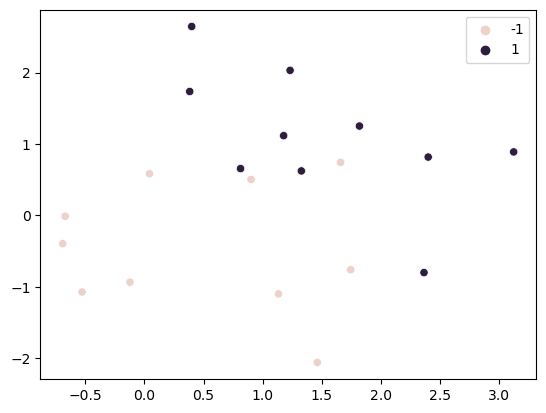

In [21]:
X[y == 1] = X[y == 1] + 0.5
sns.scatterplot(X[:, 0], X[:, 1], hue=y)

In [22]:
svm_clf3 = SVC(kernel='linear', random_state=1, C=1e5).fit(X, y)

In [23]:
svm_clf3.support_

array([ 3, 11, 19,  2,  8, 16, 18])

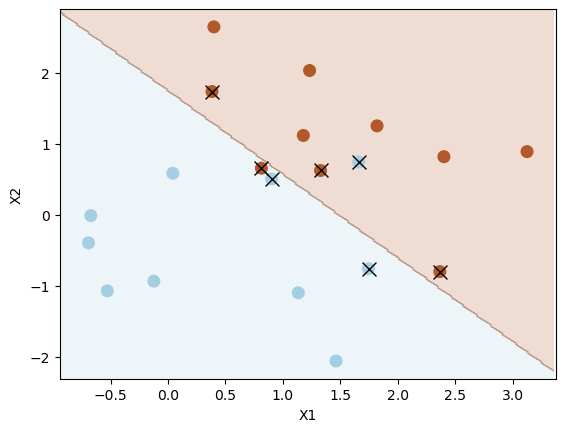

Number of support vectors:  7


In [24]:
plot_svc(svm_clf3, X, y)

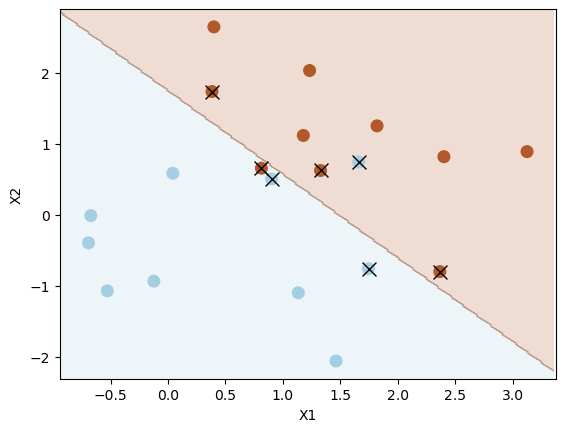

Number of support vectors:  7


In [25]:
svm_clf4 = SVC(kernel='linear', random_state=1, C=1).fit(X, y)
plot_svc(svm_clf3, X, y)

# 2. Support Vector Machine

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = np.random.randn(200, 2)
X[:100] = X[:100] + 2
X[100:150] = X[100:150] - 2
y = np.array([-1] * 150 + [1] * 50)

F:\anacoda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

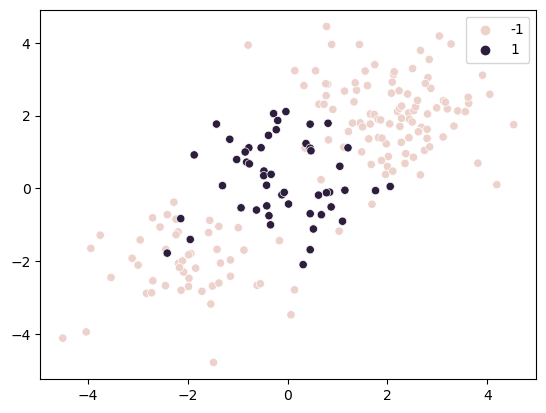

In [28]:
sns.scatterplot(X[:, 0], X[:, 1], hue=y)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=1
)

In [30]:
svm_clf = SVC(random_state=1, gamma=1).fit(X_train, y_train)

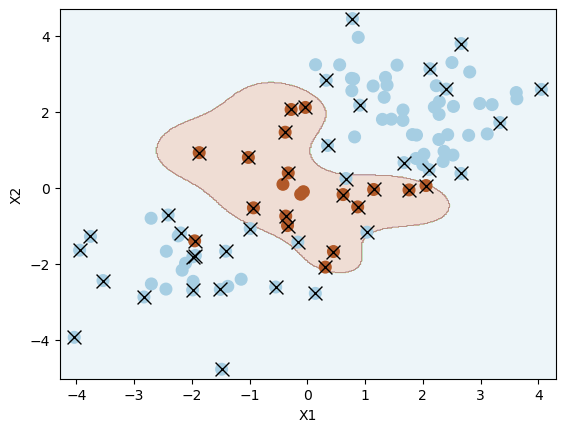

Number of support vectors:  48


In [31]:
plot_svc(svm_clf, X_train, y_train)

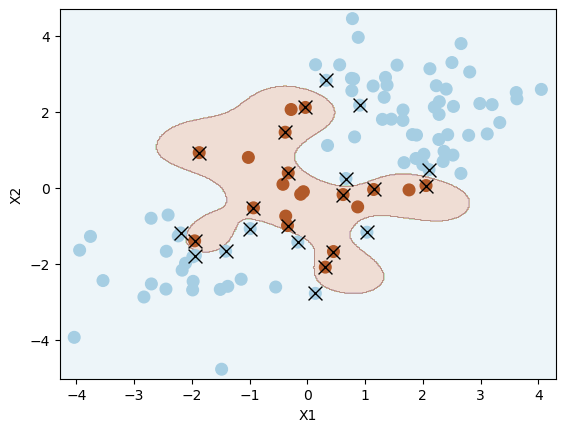

Number of support vectors:  23


In [32]:
svm_clf = SVC(C=1e5, random_state=1, gamma=1).fit(X_train, y_train)
plot_svc(svm_clf, X_train, y_train)

In [33]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.5, 1, 2, 3, 4]
}

tune_svm = GridSearchCV(
    SVC(random_state=1), param_grid
).fit(X_train, y_train)

In [34]:
tune_svm.best_params_

{'C': 1, 'gamma': 1}

In [35]:
pd.DataFrame(tune_svm.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
mean_fit_time,0.000759,0.000947,0.001128,0.0002,0.001875,0.001243,0.001629,0.001717,0.000257,0.0,...,0.003125,0.0,0.0,0.0,0.003124,0.0,0.0,0.0,0.0,0.0
std_fit_time,0.000934,0.000844,0.000934,0.000399,0.003169,0.002485,0.003258,0.003434,0.000514,0.0,...,0.006251,0.0,0.0,0.0,0.006248,0.0,0.0,0.0,0.0,0.0
mean_score_time,0.001899,0.000404,0.001863,0.000374,0.000208,0.0,0.0,0.000208,0.0,0.0,...,0.000041,0.003158,0.0,0.003125,0.0,0.0,0.003125,0.0,0.0,0.0
std_score_time,0.003211,0.000495,0.002169,0.000749,0.000416,0.0,0.0,0.000415,0.0,0.0,...,0.000082,0.006316,0.0,0.006249,0.0,0.0,0.006249,0.0,0.0,0.0
param_C,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,...,100,100,100,100,100,1000,1000,1000,1000,1000
param_gamma,0.5,1,2,3,4,0.5,1,2,3,4,...,0.5,1,2,3,4,0.5,1,2,3,4
params,"{'C': 0.1, 'gamma': 0.5}","{'C': 0.1, 'gamma': 1}","{'C': 0.1, 'gamma': 2}","{'C': 0.1, 'gamma': 3}","{'C': 0.1, 'gamma': 4}","{'C': 1, 'gamma': 0.5}","{'C': 1, 'gamma': 1}","{'C': 1, 'gamma': 2}","{'C': 1, 'gamma': 3}","{'C': 1, 'gamma': 4}",...,"{'C': 100, 'gamma': 0.5}","{'C': 100, 'gamma': 1}","{'C': 100, 'gamma': 2}","{'C': 100, 'gamma': 3}","{'C': 100, 'gamma': 4}","{'C': 1000, 'gamma': 0.5}","{'C': 1000, 'gamma': 1}","{'C': 1000, 'gamma': 2}","{'C': 1000, 'gamma': 3}","{'C': 1000, 'gamma': 4}"
split0_test_score,0.8,0.8,0.8,0.8,0.8,0.95,0.95,0.9,0.85,0.8,...,1.0,1.0,0.95,0.9,0.9,1.0,1.0,0.95,0.9,0.9
split1_test_score,0.8,0.8,0.8,0.8,0.8,0.9,0.95,0.95,0.9,0.85,...,0.95,0.95,0.95,0.9,0.85,0.95,0.95,0.95,0.9,0.85
split2_test_score,0.8,0.8,0.8,0.8,0.8,0.95,0.95,0.9,0.9,0.9,...,0.95,0.95,0.95,1.0,1.0,0.95,0.95,0.95,1.0,1.0


In [36]:
confusion_matrix(y_test, tune_svm.predict(X_test))

array([[69,  1],
       [ 9, 21]], dtype=int64)

# 3. ROC Curves

In [37]:
from sklearn.metrics import roc_curve, auc

Text(0.5, 1.0, 'Test Data')

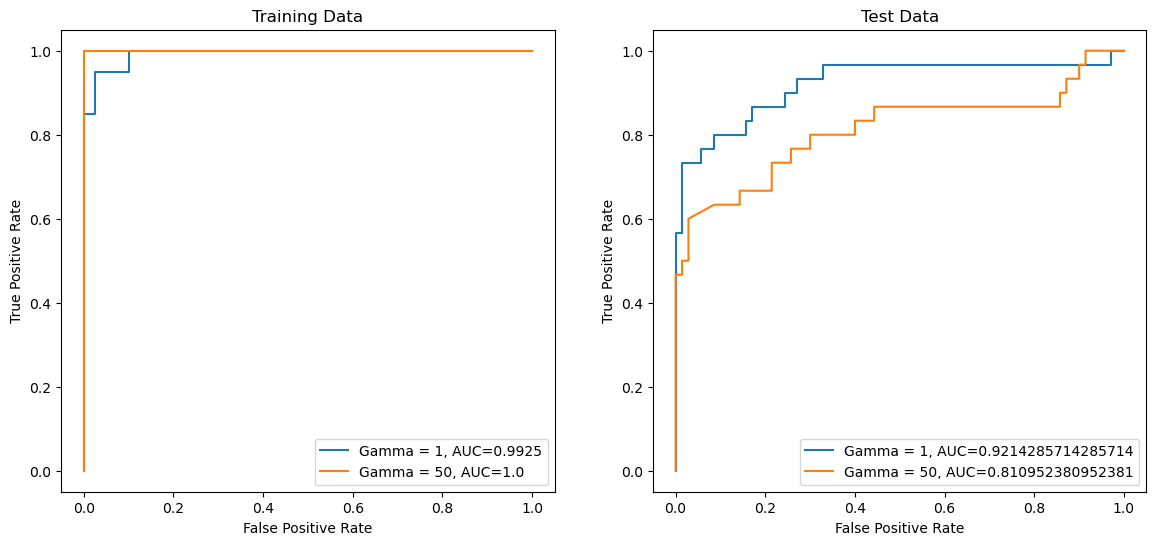

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Optimal model and flexible model
svm_opt = SVC(gamma=1, random_state=1).fit(X_train, y_train)
svm_flex = SVC(gamma=50, random_state=1).fit(X_train, y_train)

scores_opt_train = svm_opt.decision_function(X_train)
scores_opt_test = svm_opt.decision_function(X_test)
scores_flex_train = svm_flex.decision_function(X_train)
scores_flex_test = svm_flex.decision_function(X_test)


fpr_opt_train, tpr_opt_train, _ = roc_curve(y_train, scores_opt_train)
fpr_opt_test, tpr_opt_test, _ = roc_curve(y_test, scores_opt_test)
fpr_flex_train, tpr_flex_train, _ = roc_curve(y_train, scores_flex_train)
fpr_flex_test, tpr_flex_test, _ = roc_curve(y_test, scores_flex_test)

ax[0].plot(fpr_opt_train, tpr_opt_train, label=f'Gamma = 1, AUC={auc(fpr_opt_train, tpr_opt_train)}')
ax[0].plot(fpr_flex_train, tpr_flex_train, label=f'Gamma = 50, AUC={auc(fpr_flex_train, tpr_flex_train)}')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Training Data')
ax[0].legend()

ax[1].plot(fpr_opt_test, tpr_opt_test, label=f'Gamma = 1, AUC={auc(fpr_opt_test, tpr_opt_test)}')
ax[1].plot(fpr_flex_test, tpr_flex_test, label=f'Gamma = 50, AUC={auc(fpr_flex_test, tpr_flex_test)}')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend()
ax[1].set_title('Test Data')

# 4. SVM with Multiple Classes

F:\anacoda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

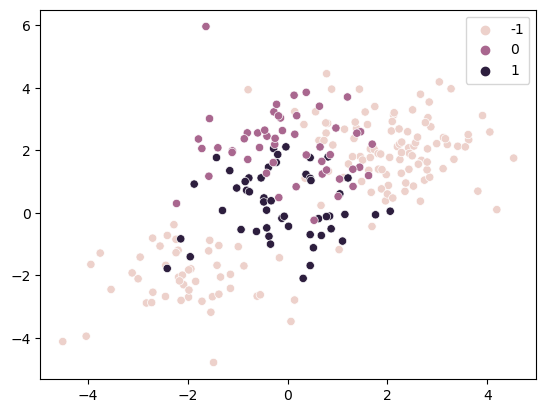

In [39]:
X = np.r_[X, np.random.randn(50, 2)]
y = np.r_[y, np.array([0] * 50)]

X[y == 0, 1] = X[y == 0, 1] + 2

sns.scatterplot(X[:, 0], X[:, 1], hue=y)

In [40]:
svm_clf = SVC(C=10, gamma=1, random_state=1,
              decision_function_shape='ovo').fit(X, y)

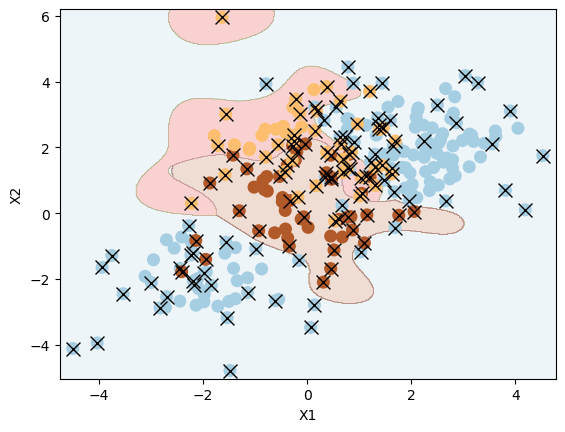

Number of support vectors:  132


In [41]:
plot_svc(svm_clf, X, y)

# 5. Application to Gene Expression Data

In [42]:
import json

In [43]:
with open('data/Khan.json') as f:
    khan = dict(json.load(f))

In [44]:
khan.keys()

dict_keys(['xtrain', 'xtest', 'ytrain', 'ytest'])

In [45]:
X_train = np.array(khan['xtrain'])
X_test = np.array(khan['xtest'])
y_train = np.array(khan['ytrain'])
y_test = np.array(khan['ytest'])

In [46]:
X_train.shape

(63, 2308)

In [47]:
X_test.shape

(20, 2308)

In [48]:
y_train.shape

(63,)

In [49]:
y_test.shape

(20,)

In [50]:
pd.Series(y_train).value_counts().sort_index()

1     8
2    23
3    12
4    20
dtype: int64

In [51]:
pd.Series(y_test).value_counts().sort_index()

1    3
2    6
3    6
4    5
dtype: int64

In [52]:
svm_clf = SVC(random_state=1, kernel='linear', C=10).fit(X_train, y_train)

In [53]:
svm_clf.support_

array([55, 56, 57, 58, 59, 60, 62,  0,  1,  2,  3,  4,  5,  6,  8,  9, 10,
       11, 12, 13, 14, 16, 19, 20, 22, 43, 44, 45, 46, 47, 48, 49, 52, 54,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42])

In [54]:
confusion_matrix(y_train, svm_clf.predict(X_train))

array([[ 8,  0,  0,  0],
       [ 0, 23,  0,  0],
       [ 0,  0, 12,  0],
       [ 0,  0,  0, 20]], dtype=int64)

In [55]:
confusion_matrix(y_test, svm_clf.predict(X_test))

array([[3, 0, 0, 0],
       [0, 6, 0, 0],
       [0, 2, 4, 0],
       [0, 0, 0, 5]], dtype=int64)